In [1]:
import numpy as np
import matplotlib.pyplot as plt
from color_separator import SepColors

In [2]:
img_path = '/Users/clay/Desktop/img_proc/thinsection.jpg'
n_colors = 5

colorpy = SepColors(img_path, n_colors)

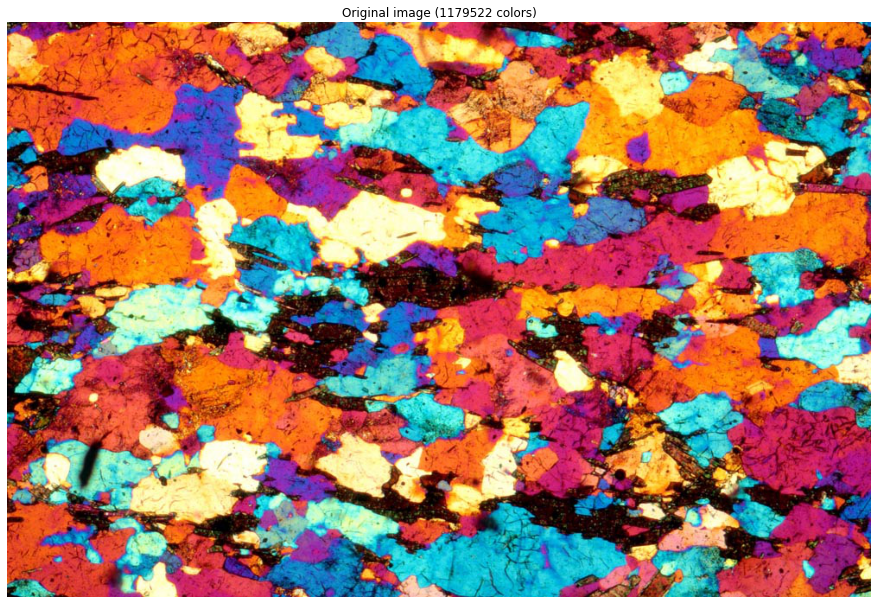

In [3]:
# load image
image = colorpy.load_image()

# count number of unique colors
uniqColors = colorpy.unique_colors(image)

# Plot original image
plt.figure(figsize=(12,12))
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image ('+str(uniqColors)+' colors)')
plt.imshow(image)
plt.show()

Fitting model on a small sub-sample of the data
done in 0.114s.
Predicting color indices on the full image (k-means)
done in 0.017s.


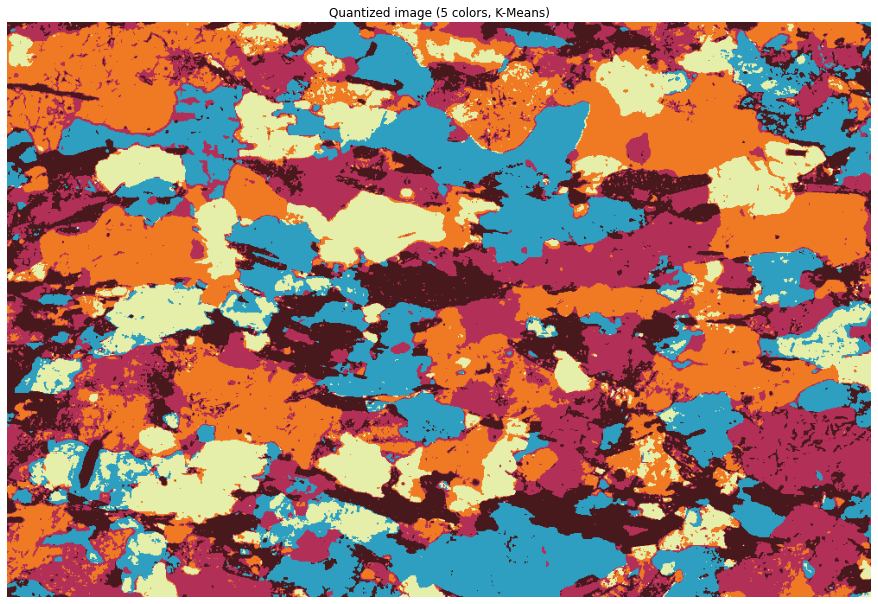

In [4]:
# cluster image using a subset of data
kmeans, labels, w, h = colorpy.cluster_img(1000)

# recreate image based on k-means clustering
quantImg = colorpy.recreate_image(kmeans.cluster_centers_, labels, w, h)

# Plot quantized image
plt.figure(figsize=(12,12))
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image ('+str(n_colors)+' colors, K-Means)')
plt.imshow(quantImg)
plt.show()

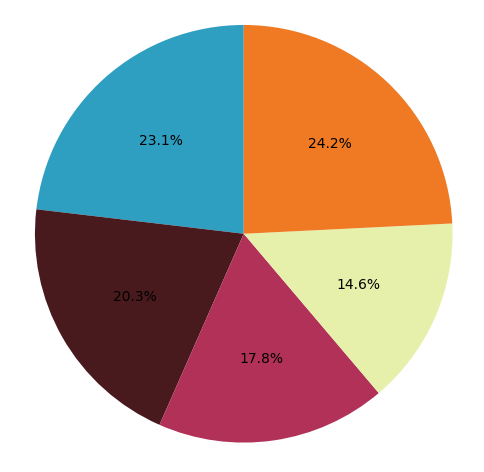

In [5]:
# colorBar, weights = colorpy.colorbar(labels, quantImg)
colors, weights = colorpy.colorbar(labels, quantImg)

# make a piechart from quantized image
fig, ax = plt.subplots(figsize=(6,6), dpi=100)
ax.pie(weights*100, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()